In [1]:
#Importing data
import pandas as pd

data = pd.read_csv('pollution_us_2000_2016.csv', header=0)
print(data.head())

   Unnamed: 0  State Code  County Code  Site Num  \
0           0           4           13      3002   
1           1           4           13      3002   
2           2           4           13      3002   
3           3           4           13      3002   
4           4           4           13      3002   

                                   Address    State    County     City  \
0  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
1  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
2  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
3  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
4  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   

   Date Local          NO2 Units  ...          SO2 Units  SO2 Mean  \
0  2000-01-01  Parts per billion  ...  Parts per billion  3.000000   
1  2000-01-01  Parts per billion  ...  Parts per billion  3.000000   
2  2000-01-01  Parts per billion

In [2]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import itertools
import warnings

In [3]:
plt.style.use('fivethirtyeight')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746661 entries, 0 to 1746660
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   State Code         int64  
 2   County Code        int64  
 3   Site Num           int64  
 4   Address            object 
 5   State              object 
 6   County             object 
 7   City               object 
 8   Date Local         object 
 9   NO2 Units          object 
 10  NO2 Mean           float64
 11  NO2 1st Max Value  float64
 12  NO2 1st Max Hour   int64  
 13  NO2 AQI            int64  
 14  O3 Units           object 
 15  O3 Mean            float64
 16  O3 1st Max Value   float64
 17  O3 1st Max Hour    int64  
 18  O3 AQI             int64  
 19  SO2 Units          object 
 20  SO2 Mean           float64
 21  SO2 1st Max Value  float64
 22  SO2 1st Max Hour   int64  
 23  SO2 AQI            float64
 24  CO Units           object 
 25  CO Mean           

In [5]:
##Dropping unneccessary columns
data = data.drop(['Unnamed: 0','State Code','County Code','Site Num','Address','NO2 Units','O3 Units','SO2 Units','CO Units'],axis=1)
data.head()

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,1.145833,4.2,21,NaN
1,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,0.878947,2.2,23,25.0
2,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,NaN,1.145833,4.2,21,NaN
3,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,NaN,0.878947,2.2,23,25.0
4,Arizona,Maricopa,Phoenix,2000-01-02,22.958333,36.0,19,34,0.013375,0.032,10,27,1.958333,3.0,22,4.0,0.850000,1.6,23,NaN


In [6]:
data.isna().sum()

State                     0
County                    0
City                      0
Date Local                0
NO2 Mean                  0
NO2 1st Max Value         0
NO2 1st Max Hour          0
NO2 AQI                   0
O3 Mean                   0
O3 1st Max Value          0
O3 1st Max Hour           0
O3 AQI                    0
SO2 Mean                  0
SO2 1st Max Value         0
SO2 1st Max Hour          0
SO2 AQI              872907
CO Mean                   0
CO 1st Max Value          0
CO 1st Max Hour           0
CO AQI               873323
dtype: int64

In [7]:
data.drop_duplicates()

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,1.145833,4.200,21,NaN
1,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,0.878947,2.200,23,25.0
2,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,NaN,1.145833,4.200,21,NaN
3,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,NaN,0.878947,2.200,23,25.0
4,Arizona,Maricopa,Phoenix,2000-01-02,22.958333,36.0,19,34,0.013375,0.032,10,27,1.958333,3.0,22,4.0,0.850000,1.600,23,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746656,Wyoming,Laramie,Not in a city,2016-03-30,1.083333,1.6,9,1,0.043917,0.048,18,44,0.000000,0.0,2,NaN,0.091667,0.100,2,1.0
1746657,Wyoming,Laramie,Not in a city,2016-03-31,0.939130,1.3,5,1,0.045263,0.047,9,44,-0.022727,0.0,0,0.0,0.067714,0.127,0,NaN
1746658,Wyoming,Laramie,Not in a city,2016-03-31,0.939130,1.3,5,1,0.045263,0.047,9,44,-0.022727,0.0,0,0.0,0.100000,0.100,0,1.0
1746659,Wyoming,Laramie,Not in a city,2016-03-31,0.939130,1.3,5,1,0.045263,0.047,9,44,0.000000,0.0,5,NaN,0.067714,0.127,0,NaN


In [8]:
data.isna().sum()

State                     0
County                    0
City                      0
Date Local                0
NO2 Mean                  0
NO2 1st Max Value         0
NO2 1st Max Hour          0
NO2 AQI                   0
O3 Mean                   0
O3 1st Max Value          0
O3 1st Max Hour           0
O3 AQI                    0
SO2 Mean                  0
SO2 1st Max Value         0
SO2 1st Max Hour          0
SO2 AQI              872907
CO Mean                   0
CO 1st Max Value          0
CO 1st Max Hour           0
CO AQI               873323
dtype: int64

In [9]:
## Prepare all 4 AQIs against state and date 
dataSt = data[['State','Date Local','NO2 Mean','NO2 AQI','O3 Mean','O3 AQI','SO2 Mean','SO2 AQI','CO Mean','CO AQI']]
dataSt = dataSt.dropna(axis='rows')  # Delete rows with NAs
dataSt = dataSt[dataSt.State!='Country Of Mexico'] #Delete Mexico since we're interested in the US
dataSt['Date Local'] = pd.to_datetime(dataSt['Date Local'],format='%Y-%m-%d')  # Change date from string to date value


In [10]:
dataSt.head()

,State,Date Local,NO2 Mean,NO2 AQI,O3 Mean,O3 AQI,SO2 Mean,SO2 AQI,CO Mean,CO AQI
1,Arizona,2000-01-01,19.041667,46,0.022500,34,3.000000,13.0,0.878947,25.0
5,Arizona,2000-01-02,22.958333,34,0.013375,27,1.958333,4.0,1.066667,26.0
9,Arizona,2000-01-03,38.125000,48,0.007958,14,5.250000,16.0,1.762500,28.0
13,Arizona,2000-01-04,40.260870,72,0.014167,28,7.083333,23.0,1.829167,34.0
17,Arizona,2000-01-05,48.450000,58,0.006667,10,8.708333,21.0,2.700000,42.0


In [11]:
dataSt.isna().sum()

State         0
Date Local    0
NO2 Mean      0
NO2 AQI       0
O3 Mean       0
O3 AQI        0
SO2 Mean      0
SO2 AQI       0
CO Mean       0
CO AQI        0
dtype: int64

<AxesSubplot:>

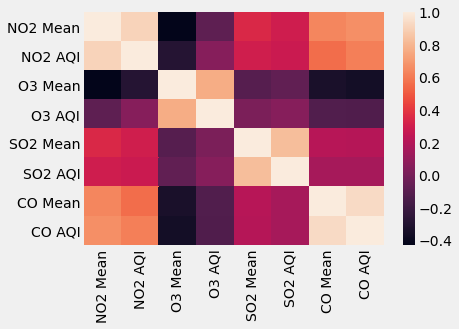

In [12]:
corr = dataSt.corr()
sns.heatmap(corr)

In [13]:
indices = dataSt['State'] == 'Arizona'
az = dataSt.loc[indices,:] #extract dataframe with just arizona information

In [14]:
az.set_index('Date Local')

,State,NO2 Mean,NO2 AQI,O3 Mean,O3 AQI,SO2 Mean,SO2 AQI,CO Mean,CO AQI
Date Local,,,,,,,,,
2000-01-01,Arizona,19.041667,46,0.022500,34,3.000000,13.0,0.878947,25.0
2000-01-02,Arizona,22.958333,34,0.013375,27,1.958333,4.0,1.066667,26.0
2000-01-03,Arizona,38.125000,48,0.007958,14,5.250000,16.0,1.762500,28.0
2000-01-04,Arizona,40.260870,72,0.014167,28,7.083333,23.0,1.829167,34.0
2000-01-05,Arizona,48.450000,58,0.006667,10,8.708333,21.0,2.700000,42.0
...,...,...,...,...,...,...,...,...,...
2016-03-27,Arizona,4.545833,9,0.035042,44,0.091667,0.0,0.275000,3.0
2016-03-28,Arizona,4.343478,13,0.035583,40,0.073913,0.0,0.258333,3.0
2016-03-29,Arizona,1.787500,5,0.041417,42,0.000000,0.0,0.200000,2.0


<AxesSubplot:xlabel='Date Local'>

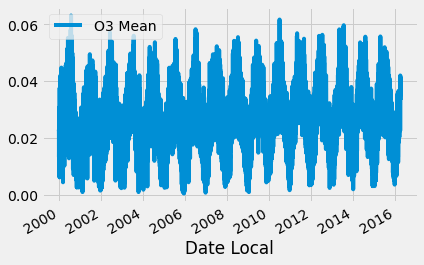

In [15]:
az.plot(x='Date Local', y='O3 Mean')

In [16]:
#going to group by date. There are duplicates, so I'm taking the mean values of those.
dataSt = dataSt.groupby(['Date Local']).mean()  # Take mean values if there are depulicated entries


In [17]:
yn = dataSt['NO2 AQI'].resample('M').mean()
yo = dataSt['O3 AQI'].resample('M').mean()
yc = dataSt['CO AQI'].resample('M').mean()
ys = dataSt['SO2 AQI'].resample('M').mean()

In [18]:
dataSt.head(5)

,NO2 Mean,NO2 AQI,O3 Mean,O3 AQI,SO2 Mean,SO2 AQI,CO Mean,CO AQI
Date Local,,,,,,,,
2000-01-01,18.508666,32.307692,0.018138,23.974359,4.346910,13.384615,0.773897,16.000000
2000-01-02,14.692258,27.184211,0.020553,26.973684,3.438415,11.315789,0.590317,11.342105
2000-01-03,23.830700,37.315789,0.012774,18.921053,3.390395,11.605263,0.880811,16.131579
2000-01-04,24.160910,38.650000,0.013022,18.150000,2.758615,10.125000,1.006128,18.050000
2000-01-05,23.804671,38.700000,0.015492,21.675000,3.006528,11.375000,1.009010,17.775000


Text(0, 0.5, 'CO AQI')

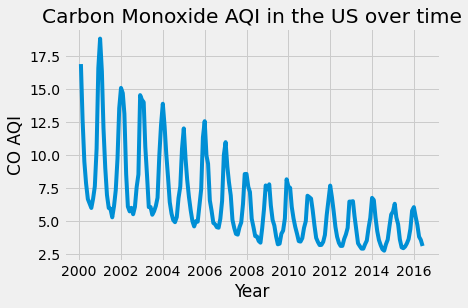

In [19]:
plt.plot(yc)
plt.title('Carbon Monoxide AQI in the US over time')
plt.xlabel('Year')
plt.ylabel('CO AQI')

Text(0, 0.5, 'O3 AQI')

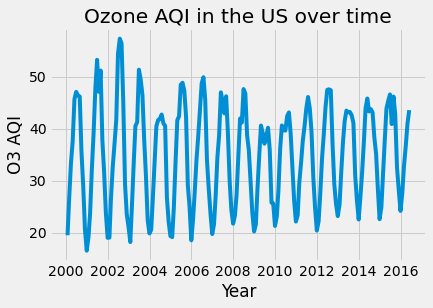

In [20]:
plt.plot(yo)
plt.title('Ozone AQI in the US over time')
plt.xlabel('Year')
plt.ylabel('O3 AQI')

Text(0, 0.5, 'NO2 AQI')

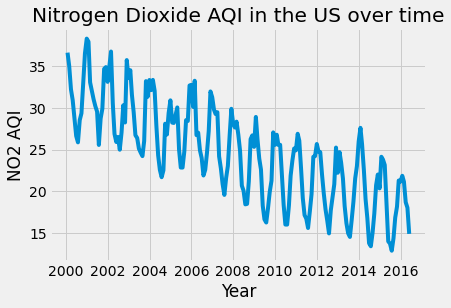

In [21]:
plt.plot(yn)
plt.title('Nitrogen Dioxide AQI in the US over time')
plt.xlabel('Year')
plt.ylabel('NO2 AQI')

Text(0, 0.5, 'SO2 AQI')

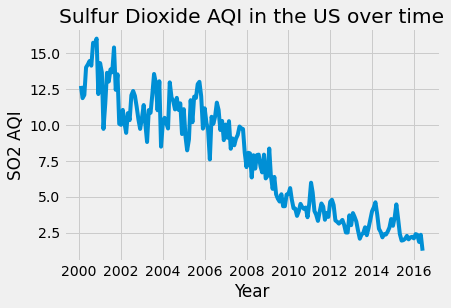

In [22]:
plt.plot(ys)
plt.title('Sulfur Dioxide AQI in the US over time')
plt.xlabel('Year')
plt.ylabel('SO2 AQI')

#Apart from Ozone, all the greenhouse gas AQIs have gone down over the last 16 years. This was an unexpected and positive finding. According to the EPA, any AQI rating under 50 is considered 'Good.' So overall, the US air quality has been consistently good and getting better. Again, very surprising.

In [23]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

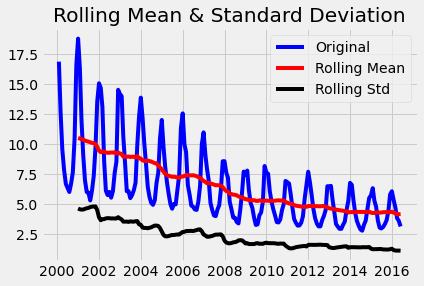

Results of Dickey-Fuller Test:
Test Statistic                  -2.167784
p-value                          0.218145
#Lags Used                      15.000000
Number of Observations Used    181.000000
Critical Value (1%)             -3.467005
Critical Value (5%)             -2.877644
Critical Value (10%)            -2.575355
dtype: float64


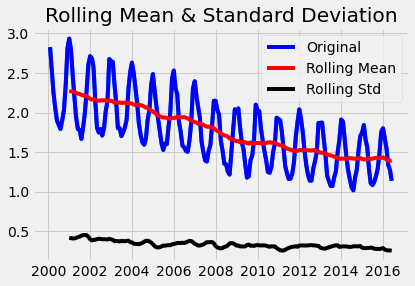

Results of Dickey-Fuller Test:
Test Statistic                  -1.224011
p-value                          0.663183
#Lags Used                      15.000000
Number of Observations Used    181.000000
Critical Value (1%)             -3.467005
Critical Value (5%)             -2.877644
Critical Value (10%)            -2.575355
dtype: float64


In [24]:
test_stationarity(yc)
#take a log
yc_log=np.log(yc)
plt.plot(yc_log)
test_stationarity(yc_log)

#The results of the Dickey-Fuller test indicate that there is a unit root, and the mean is not stationary over time for our carbon monoxide AQI levels.

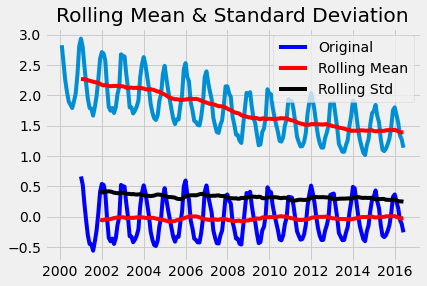

Results of Dickey-Fuller Test:
Test Statistic                  -4.681802
p-value                          0.000091
#Lags Used                      15.000000
Number of Observations Used    170.000000
Critical Value (1%)             -3.469413
Critical Value (5%)             -2.878696
Critical Value (10%)            -2.575917
dtype: float64


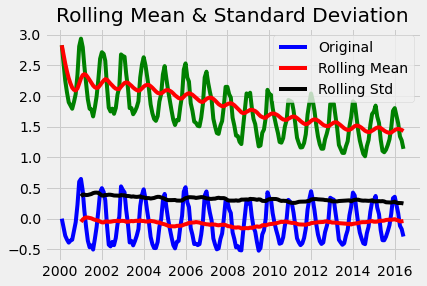

Results of Dickey-Fuller Test:
Test Statistic                  -3.439674
p-value                          0.009678
#Lags Used                      15.000000
Number of Observations Used    181.000000
Critical Value (1%)             -3.467005
Critical Value (5%)             -2.877644
Critical Value (10%)            -2.575355
dtype: float64


In [25]:
# Moving average
moving_avg = yc_log.rolling(window=12).mean()
plt.plot(yc_log)
plt.plot(moving_avg, color='red')
yc_log_moving_avg_diff = yc_log - moving_avg
yc_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(yc_log_moving_avg_diff)
# exponentially weighted moving average
expwighted_avg = yc_log.ewm(halflife=12).mean()
plt.plot(yc_log, color='green')
plt.plot(expwighted_avg, color='red')
yc_log_ewma_diff = yc_log - expwighted_avg
test_stationarity(yc_log_ewma_diff)

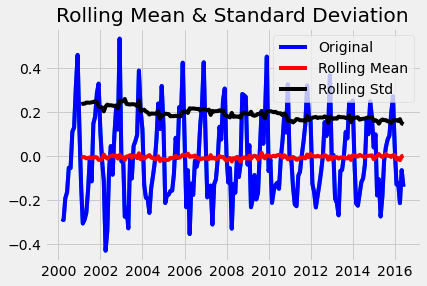

Results of Dickey-Fuller Test:
Test Statistic                  -3.386861
p-value                          0.011415
#Lags Used                      14.000000
Number of Observations Used    181.000000
Critical Value (1%)             -3.467005
Critical Value (5%)             -2.877644
Critical Value (10%)            -2.575355
dtype: float64


In [26]:
# Eliminating Trend and Seasonality
#first order differencing 
yc_log_diff = yc_log - yc_log.shift()
plt.plot(yc_log_diff)
yc_log_diff.dropna(inplace=True)
test_stationarity(yc_log_diff)

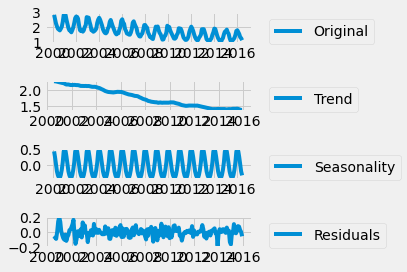

In [33]:
# Decomposing
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(yc_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(yc_log, label='Original')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()


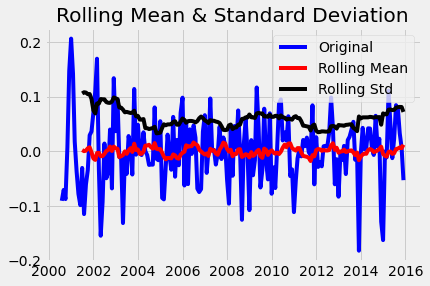

Results of Dickey-Fuller Test:
Test Statistic                -9.468149e+00
p-value                        4.175725e-16
#Lags Used                     9.000000e+00
Number of Observations Used    1.750000e+02
Critical Value (1%)           -3.468280e+00
Critical Value (5%)           -2.878202e+00
Critical Value (10%)          -2.575653e+00
dtype: float64


In [31]:
yc_log_decompose = residual
yc_log_decompose.dropna(inplace=True)
test_stationarity(yc_log_decompose)

C:\Users\hindm\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


Text(0.5, 1.0, 'Autocorrelation Function')

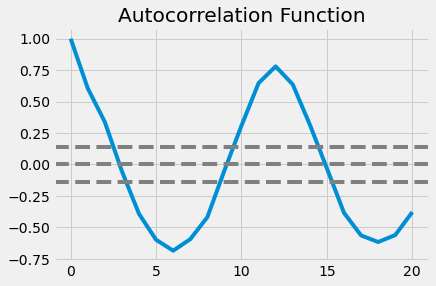

In [35]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(yc_log_diff, nlags=20)
lag_pacf = pacf(yc_log_diff, nlags=20, method='ols')
#Plot ACF: 

plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(yc_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(yc_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')




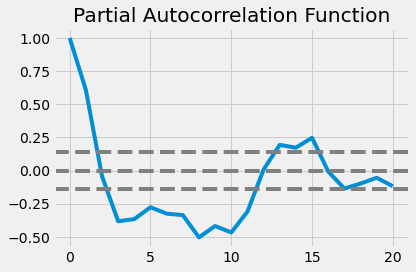

In [36]:
#Plot PACF:
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(yc_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(yc_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [37]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2],12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

warnings.filterwarnings("ignore") # specify to ignore warning messages

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:791.5806849711203
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:531.8188064490218
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:-301.364528405967
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:-282.4010423075096
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:-377.5764777404902
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:-429.0335773889133
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-284.03626263972393
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-311.851867519025
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:534.9656414128676
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:325.1973808845089
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:-325.2994463210148
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:-306.01114575204235
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-383.74938071204576
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-446.6075944383758
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-312.19954630491384
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:-299.68194549428995
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-101.61580302183302
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-183.958681

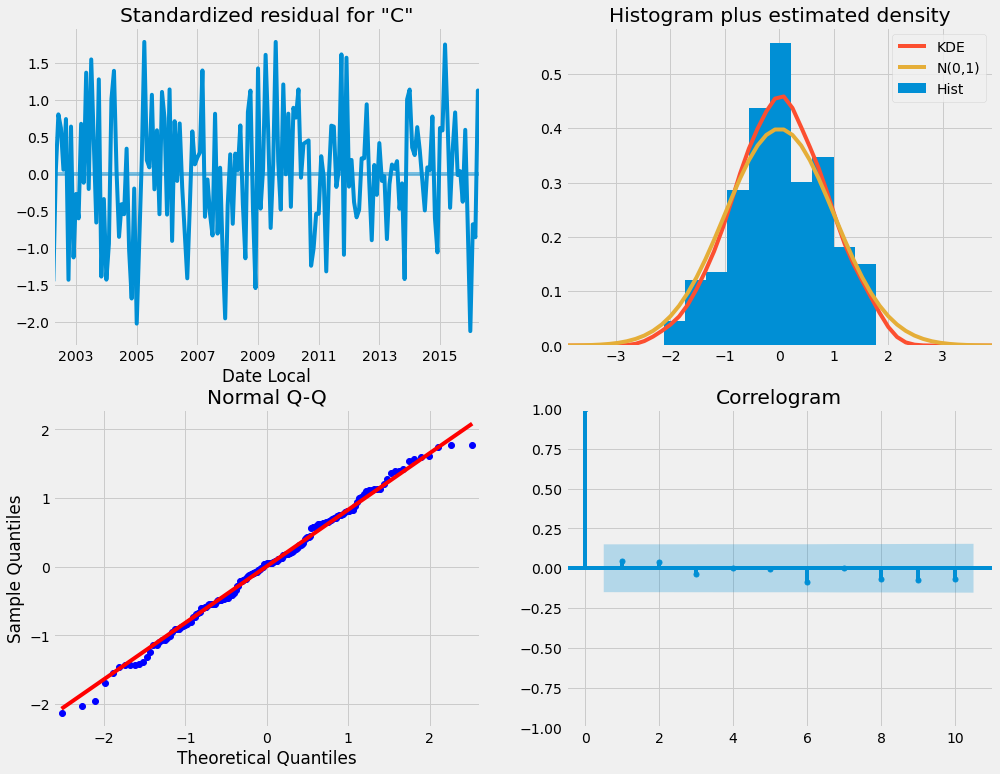

In [43]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(yc_log,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
        
            mod = sm.tsa.statespace.SARIMAX(yc_log,
                                order=(1,0,1),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

results.plot_diagnostics(figsize=(15, 12))
plt.show()

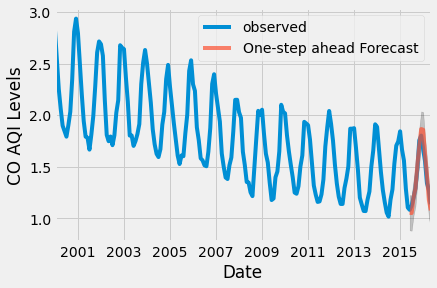

In [44]:
pred = results.get_prediction(start=pd.to_datetime('2015-06-30 00:00:00'), dynamic=False)
pred_ci = pred.conf_int()
ax = yc_log['2000':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('CO AQI Levels')
plt.legend()

plt.show()

In [45]:
yc_forecasted = np.exp(pred.predicted_mean)
yc_truth =np.exp( yc_log['2015-06-30 00:00:00':])

The Mean Squared Error of our forecasts is 0.15


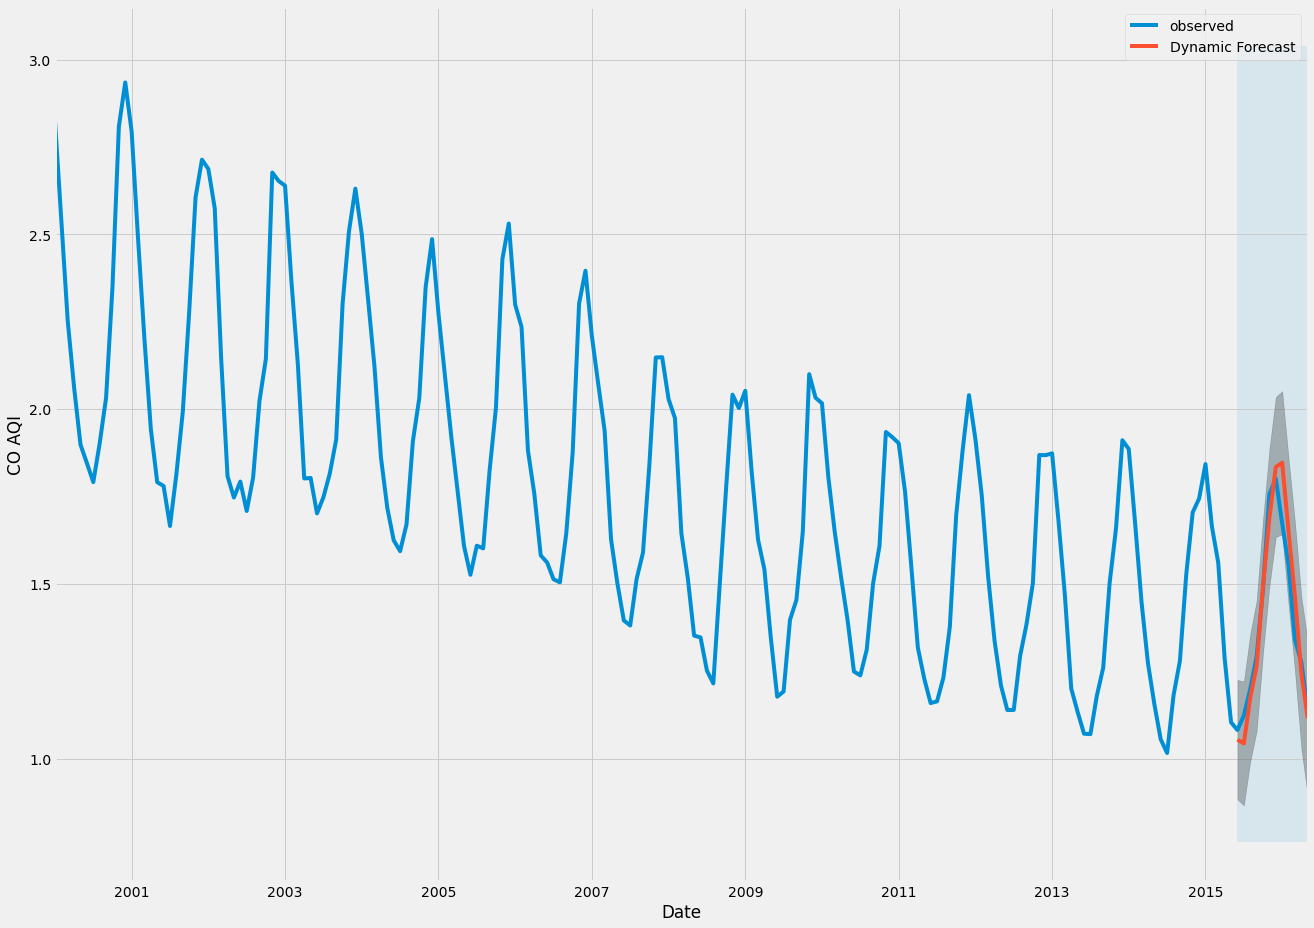

In [46]:
# Compute the mean square error
mse =( (yc_forecasted - yc_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

pred_dynamic = results.get_prediction(start=pd.to_datetime('2015-06-30 00:00:00'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

ax = yc_log['2000':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2015-06-30 00:00:00'), yc_log.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('CO AQI')

plt.legend()
plt.show()

In [47]:
# Extract the predicted and true values of our time series
yc_forecasted = np.exp(pred_dynamic.predicted_mean)
yc_truth = np.exp(yc_log['1998-01-01':])


In [48]:
# Compute the mean square error
mse = ((yc_forecasted - yc_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=12)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

The Mean Squared Error of our forecasts is 0.15


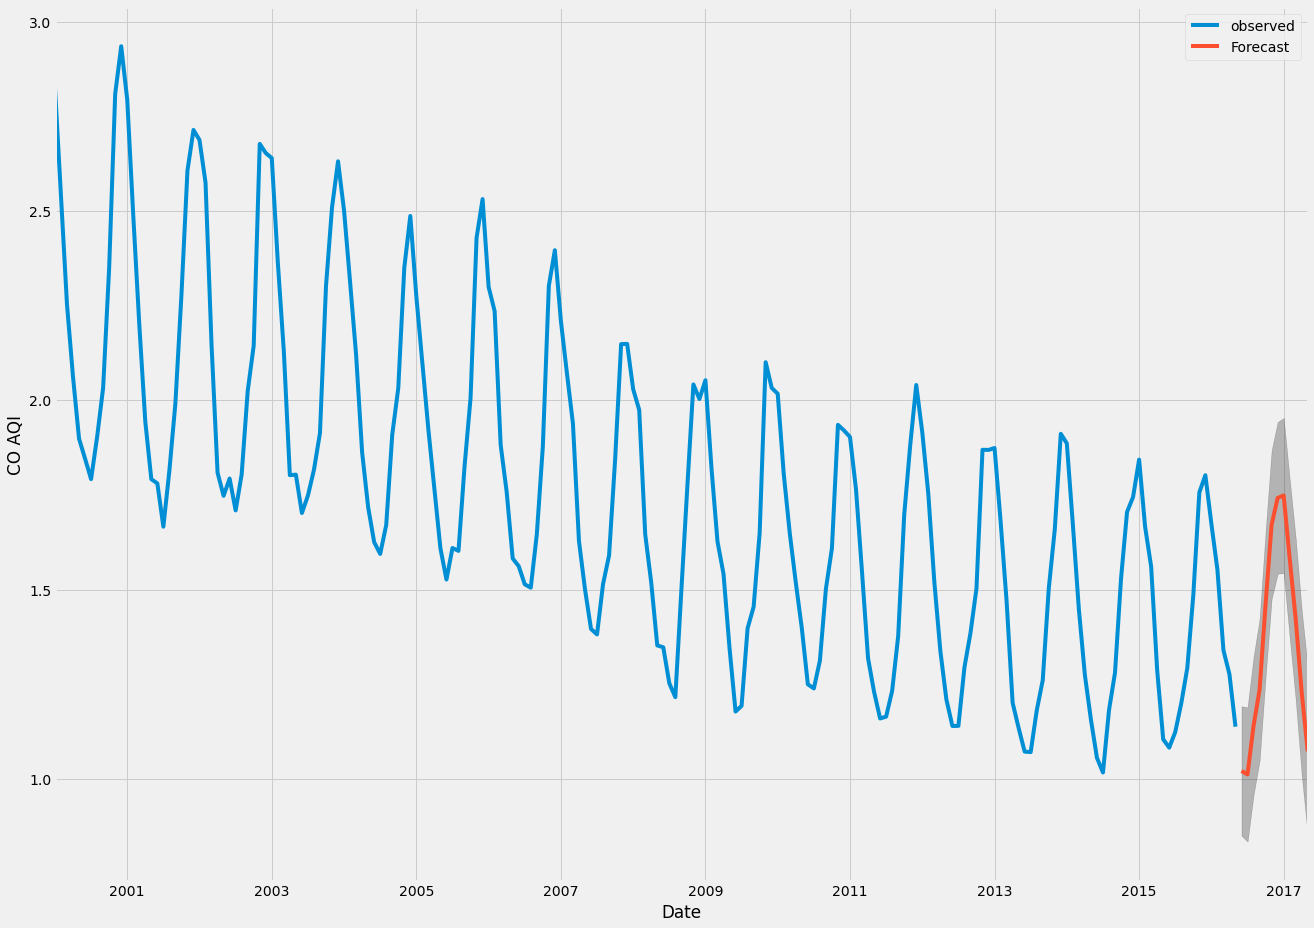

2016-06-30    2.775951
2016-07-31    2.750171
2016-08-31    3.126400
2016-09-30    3.438832
2016-10-31    4.311125
2016-11-30    5.318269
2016-12-31    5.708116
2017-01-31    5.745483
2017-02-28    4.866006
2017-03-31    4.146266
2017-04-30    3.411714
2017-05-31    2.923208
Freq: M, Name: predicted_mean, dtype: float64

In [49]:
ax = yc_log.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO AQI')

plt.legend()
plt.show()


np.exp(pred_uc.predicted_mean)